### Read and Understand the data

In [1]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import all the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Read the dataset from csv file 
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Let's look at the no. of rows and columns in the dataset 
leads.shape

(9240, 37)

In [5]:
# Get the info about columns
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Total 7 numeric columns and 30 categorical columns. None of the columns have inconsistent datatype, hence no conversion is required.

In [6]:
# Check the details of numerical data 
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


From above observation we can see that the column 'TotalVisits','Total Time Spent on Website','Page Views Per Visit' having outliers, because there is significant difference between min and max values. So we will verify it later by using EDA.

### Data Quality Check & Cleaning 

In [7]:
# Checking for duplicates and dropping the entire duplicate row if any
leads.drop_duplicates(subset=None, inplace=True)

In [8]:
leads.shape

(9240, 37)

Since the shape before and after dropping the duplicates is same hence it seems no duplicates value in the dataset.

There are some categorical variables have a values called 'Select'. It means that the customer had not selected any option while filling the form. So its better to impute these values with null values.

In [9]:
# Imputing 'Select' values with NaN.
leads = leads.replace('Select', np.nan)

In [10]:
# Checking the null percentage in each column 
round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

We can see that there are highest percentage of missing values in some column. We can drop the columns with missing values greater than 30% .

In [11]:
# Now let's drop those columns which have more than 30% null values
leads = leads.drop(['Specialization', 'How did you hear about X Education', 'Tags', 'Lead Quality','Lead Profile','City', 
                    'Asymmetrique Activity Index', 'Asymmetrique Profile Index','Asymmetrique Activity Score', 
                    'Asymmetrique Profile Score'], axis=1)

In [12]:
leads.shape

(9240, 27)

In [13]:
# Again cheking null percentage after removing the column 
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

Lead Source, TotalVisits, Page Views Per Visit, Last Activity, Country, What is your current occupation, What matters most to you in choosing a course, these all columns also have null values but less than 30%.

So let's see whether we need to impute values in above columns or drop the columns.

In [14]:
# Let's check the value counts in Country column
leads.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [15]:
country_perc = round(100*(len(leads[leads['Country'] == 'India'])/len(leads['Country'])),2)
print(country_perc)

70.26


As Country column has 27% null values and 'India' occurs 70% times in this column  so better to drop it because data is skewed here.

In [16]:
leads=leads.drop(['Country'], axis=1)

In [17]:
# Let's check the value counts in Lead Source column
leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

As we can see above Google appears twice in different cases. Hence we will convert all values with same case i.e. 'Google'.

As Google has major chunk of data so we can impute all null values with Google.

In [18]:
leads['Lead Source'] = leads['Lead Source'].replace('google', 'Google')
leads['Lead Source'] = leads['Lead Source'].replace(np.nan, 'Google')

In [19]:
# Let's check the value counts in TotalVisits column
leads['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [20]:
# Let's check the median of the above column
leads['TotalVisits'].median()

3.0

In [21]:
# We will impute the null values by 3 which is median in TotalVisits column
leads['TotalVisits'] = leads['TotalVisits'].replace(np.nan, leads['TotalVisits'].median())

In [22]:
# Let's check the value counts for 'Page Views Per Visit' column 
leads['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [23]:
leads['Page Views Per Visit'].median()

2.0

In [24]:
leads['Page Views Per Visit'] = leads['Page Views Per Visit'].replace(np.nan, leads['Page Views Per Visit'].median())

In [25]:
# Let's check the value counts for 'Last Activity' column 
leads['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

As we do not know the last activity of leads which are missing values and most frequent value is 'Email Opened' so we can impute missing values with 'Email Opened'.

In [26]:
leads['Last Activity']=leads['Last Activity'].replace(np.nan, 'Not sure')

In [27]:
# Check the value counts for the column "What is your current Occupation"
leads['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [28]:
leads['What is your current occupation']=leads['What is your current occupation'].replace(np.nan, 'No Information')

In [29]:
# Check the value counts for the column 'What matters most to you in choosing a course' 
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [30]:
matters_perc= round(100*len(leads[leads['What matters most to you in choosing a course'] 
                            == 'Better Career Prospects'])/len(leads['What matters most to you in choosing a course']),2)
print(matters_perc)

70.65


Since 'Better Career Prospects' occurs around 70% of times in the 'What matters most to you in choosing a course' column, and since the column also has around 29% as missing values, so we can drop the column.

In [31]:
leads = leads.drop(['What matters most to you in choosing a course'], axis=1)

In [32]:
# checking percentage of null values in each column
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

We can see above that there is no missing values present in the dataset.

In [33]:
# Checking duplicate values in 'Prospect ID and 'Lead Number'

leads.duplicated(subset = 'Prospect ID').sum()
leads.duplicated(subset = 'Lead Number').sum()

0

'Prospect ID' & 'Lead Number' both don't have duplicate values means these columns identify each data uniquely. So we can drop it.

In [34]:
leads.drop(['Prospect ID', 'Lead Number'],1, inplace=True)

In [35]:
# Checking the value_counts of remaining variables for better data understanding

cols=list(leads.iloc[:,:])  
for i in cols:
    print(i,'=====')
    print(leads[i].value_counts(), '\n')

Lead Origin =====
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64 

Lead Source =====
Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64 

Do Not Email =====
No     8506
Yes     734
Name: Do Not Email, dtype: int64 

Do Not Call =====
No     9238
Yes       2
Name: Do Not Call, dtype: int64 

Converted =====
0    5679
1    3561
Name: Converted, dtype: in

From the above value_counts data we can see that columns 'Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper,'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',' Get updates on DM Content','I agree to pay the amount through cheque' are having highly imbalance data or skewed data and these variables will not contribute significatly to analysis ,so better to drop these columns..

In [36]:
# Dropping some redundant columns
leads.drop(['Do Not Call', 'Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
            'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
            'Get updates on DM Content','I agree to pay the amount through cheque'],1,inplace=True)

In [37]:
leads.shape

(9240, 11)

### Exploratory Data Analysis

#### Univariate Analysis

In [38]:
# As per problem statement 'Converted' is our target variable. Now let's calculate conversion rate.
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

38.53896103896104

In [39]:
# Checking value count of target variable 'Converted':-
leads.Converted.value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

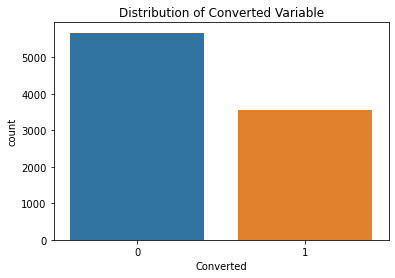

In [40]:
# Plotting count plot to get clear view of data distribution of 'Converted' column
sns.countplot(leads.Converted)
plt.title("Distribution of Converted Variable")
plt.show()

In [41]:
# Checking ratio of imbalance:-
(leads.Converted==1).sum()/(leads.Converted==0).sum()

0.6270470153195985

From value count we can see that data is properly balanced with respect to ratio.

#### Analyzing Categorical Variables

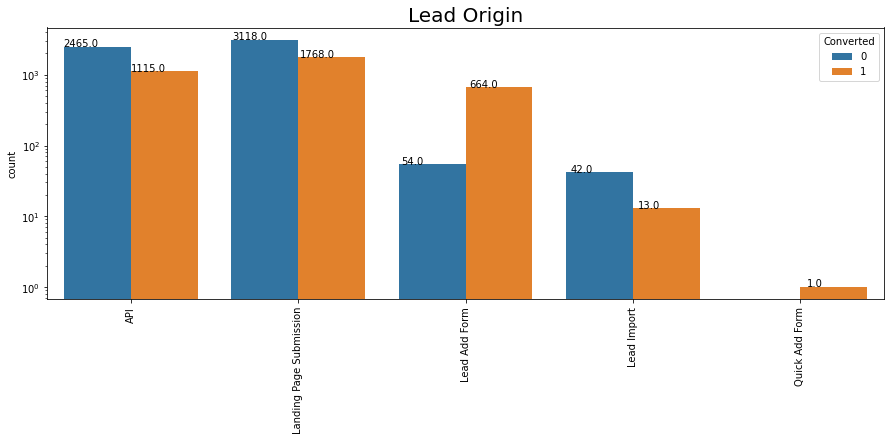

In [42]:
# Plotting count plot of 'Lead Origin' for both 'Converted' 0 and 1
plt.figure(figsize = (15,5))

ax=sns.countplot(x = "Lead Origin", hue = "Converted", data = leads)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Lead Origin',fontsize=20)
ax.set_yscale('log')   # Setting logrithmic scale

plt.show()

From above plot we can observed that :
- Conversion rate for 'API' is ~ 31% and for 'Landing Page Submission' is ~36%.
- For 'Lead Add Form' number of conversion is more than unsuccessful conversion.
- Count of 'Lead Import' is lesser.

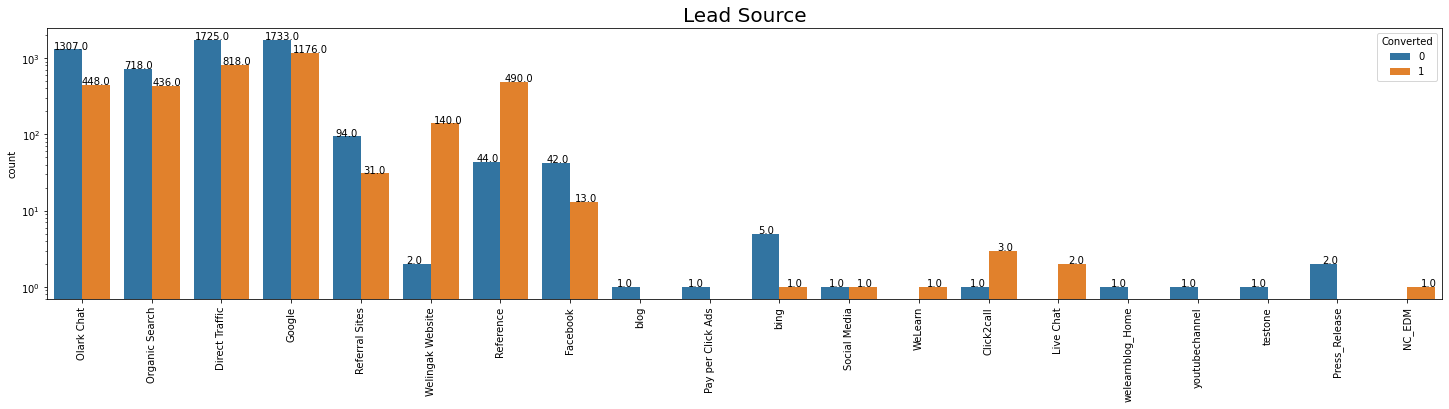

In [43]:
# Plotting count plot of 'Lead Source' based on 'Converted' value 0 and 1
plt.figure(figsize = (25,5))

ax=sns.countplot(x = "Lead Source", hue = "Converted", data = leads)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Lead Source',fontsize=20)
ax.set_yscale('log')
plt.show()

From above plot we can observed that:
- Google and Direct traffic generates maximum number of leads.
- Conversion rate of 'Reference' and 'Welingak Website' leads is high.

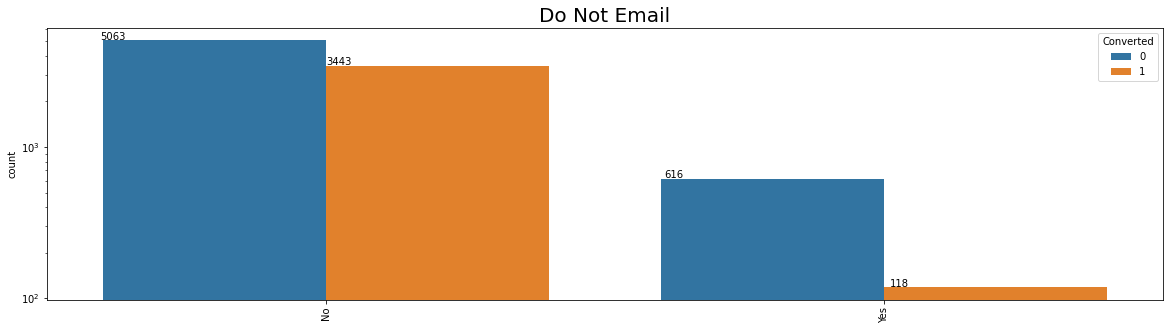

In [44]:
# Plotting count plot of 'Lead Source' based on 'Converted' value 0 and 1

plt.figure(figsize = (20,5))

ax=sns.countplot(x = "Do Not Email", hue = "Converted", data = leads)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Do Not Email',fontsize=20)

ax.set_yscale('log')# Setting logrithmic scale

plt.show()

People who opted for mail option are becoming more leads.

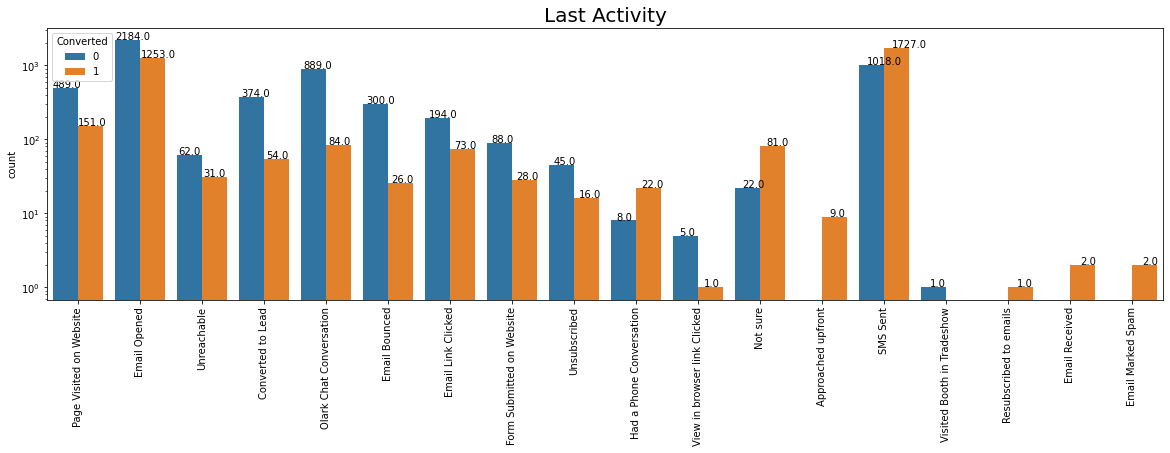

In [45]:
# Plotting count plot of 'Lead Source' based on 'Converted' value 0 and 1 :-

plt.figure(figsize = (20,5))

ax=sns.countplot(x = "Last Activity", hue = "Converted", data = leads)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Last Activity',fontsize=20)

ax.set_yscale('log')# Setting logrithmic scale

plt.show()

From above plot we can observed that:
- Conversion rate for last activity of 'SMS Sent' is ~63%.
- Highest last activity of leads is 'Email Opened'.

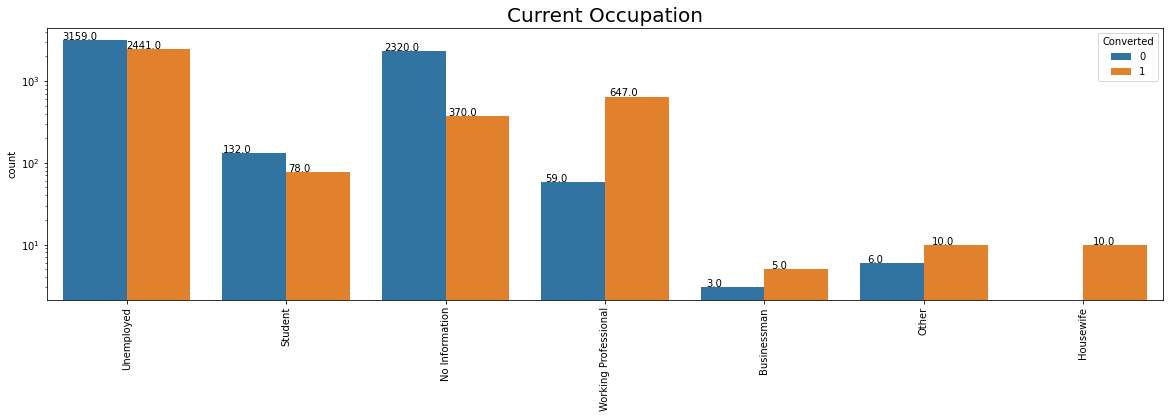

In [46]:
# Plotting count plot of 'What is your current occupation' based on 'Converted' value 0 and 1 :-

plt.figure(figsize = (20,5))

ax=sns.countplot(x = "What is your current occupation", hue = "Converted", data = leads)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Current Occupation',fontsize=20)

ax.set_yscale('log')# Setting logrithmic scale

plt.show()

From above graph we conclude that:
- 'Unemployed' leads are generating more number of leads and having ~45% conversion rate.
- Conversion rate is higher for 'Working Professionals'.

#### Checking for Outliers 

In [47]:
# Checking outliers at 25%,50%,75%,90%,95% and above
leads.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440
std,0.486714,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000
95%,1.000000,10.000000,1562.000000,6.000000
99%,1.000000,17.000000,1840.610000,9.000000


From the above, we can see that outlier exists in the columns TotalVisits and Page Views Per Visit columns.

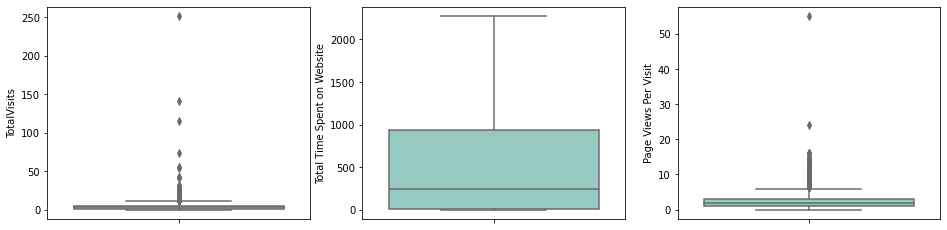

In [48]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(16, 18))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', palette='Set3', data = leads)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', palette='Set3', data = leads)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', palette='Set3', data = leads)
plt.show()

We can see from above box plot that only upper range outliers are present in 'TotalVisits and 'Page Views Per Visit, so need to treat outliers and no outliers present in 'Total Time Spent on Website'.

In [49]:
# Removing values beyond 99% for Total Visits

Q1 = leads['TotalVisits'].quantile(0.99)
leads = leads[leads["TotalVisits"] < Q1]

In [50]:
Q3 = leads['Page Views Per Visit'].quantile(0.99)
leads = leads[leads["Page Views Per Visit"] < Q3]

In [51]:
# Checking outliers at 25%,50%,75%,90%,95% and above
leads.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9029.000000,9029.000000,9029.000000,9029.000000
mean,0.385092,3.087164,483.133016,2.226383
std,0.486644,2.801244,547.420675,1.823395
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,7.000000,1.000000
50%,0.000000,3.000000,245.000000,2.000000
75%,1.000000,4.000000,929.000000,3.000000
90%,1.000000,7.000000,1378.000000,5.000000
95%,1.000000,8.000000,1558.000000,6.000000
99%,1.000000,13.000000,1839.720000,7.000000


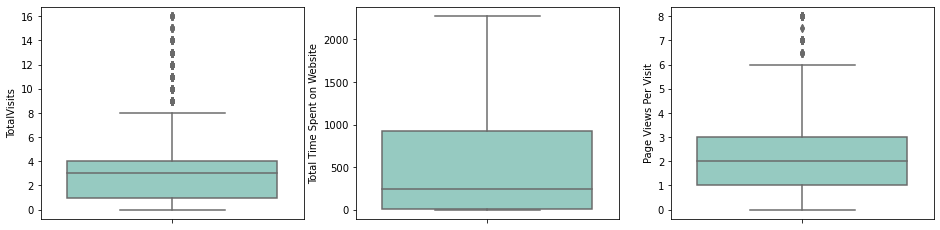

In [52]:
# Checking the Outliers

plt.figure(figsize=(16, 18))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', palette='Set3', data = leads)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', palette='Set3', data = leads)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', palette='Set3', data = leads)
plt.show()

In [53]:
# Calculate the percentage of data retained

retained_perc= round(100*(len(leads)/9240),2)
print(retained_perc)

97.72


At this point, the data has been cleaned and around 98% of data has been retained.

#### Bivariate Analysis

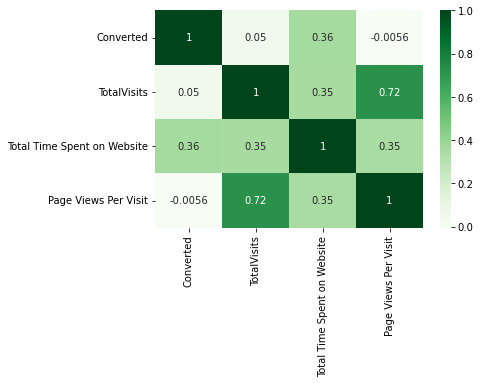

In [54]:
# Heatmap to understand the attributes correlation:-

plt.figure(figsize = (6,4))        
ax = sns.heatmap(leads.corr(),annot = True,cmap='Greens')

- TotalVisits' and 'Page Views per Visit' are highly correlated with correlation of 0.72.
- 'Total Time Spent on Website' has correlation of 0.36 with target variable 'Converted'.

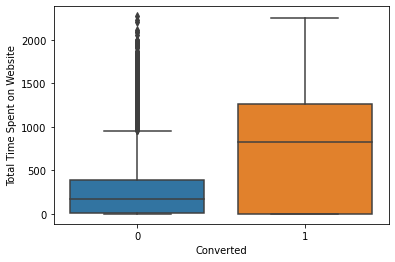

In [55]:
# Plotting box plot of 'Total Time Spent on Website' vs 'Converted' to check data distribution
plt.figure(figsize=(6,4))
sns.boxplot(x='Converted', y='Total Time Spent on Website', data=leads)
plt.show()

Leads spending more time on website are more likely to opt for courses or converted.

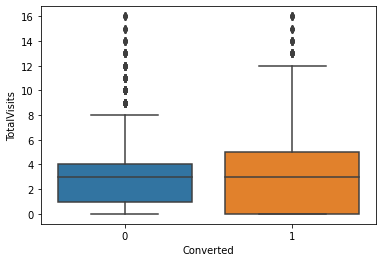

In [56]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Converted', y='TotalVisits', data=leads)
plt.show()

From above plot we can see that the median for Converted and Non-Converted is approximately same.

### Data Preparation

#### Converting some binary variables (No/Yes) to 0/1

In [57]:
varlist = ['Do Not Email', 'A free copy of Mastering The Interview']
def binary_map(x):
    return x.map({'Yes':1, 'No':0})
leads[varlist] = leads[varlist].apply(binary_map)

In [58]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unemployed,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Student,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Unemployed,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,Modified


#### For categorical variables with multiple levels, create dummy features

In [59]:
# Create dummy variable for the following columns

#Lead Origin
lo=pd.get_dummies(leads['Lead Origin'], prefix='LeadOrigin')
# Dropping Quick Add Form column
lo1=lo.drop(['LeadOrigin_Quick Add Form'], axis=1)
# Adding the results to the master dataframe
leads=pd.concat([leads, lo1], axis=1)

# Lead Source :
ls= pd.get_dummies(leads['Lead Source'], prefix='LeadSource')
ls1 = ls.drop(['LeadSource_NC_EDM'], axis=1)
leads = pd.concat([leads,ls1], axis=1)

# last Activity
la = pd.get_dummies(leads['Last Activity'], prefix='LastActivity')
la1 = la.drop(['LastActivity_Resubscribed to emails'], axis=1)
leads = pd.concat([leads,la1], axis=1)

# What is your current occupation
co = pd.get_dummies(leads['What is your current occupation'], prefix='CurrentOccupation')
co1 = co.drop(['CurrentOccupation_Businessman'], axis=1)
leads = pd.concat([leads,co1], axis=1)

# Last Notable Activity
lna= pd.get_dummies(leads['Last Notable Activity'], prefix='LastNotableActivity')
lna1 = lna.drop(['LastNotableActivity_Resubscribed to emails'], axis=1)
leads = pd.concat([leads,lna1], axis=1)


In [60]:
# Dropping repeated columns for which dummy variables were created
leads = leads.drop(['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation',
                    'Last Notable Activity'], axis=1)

In [61]:
leads.shape

(9029, 67)

In [62]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 67 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Do Not Email                                      9029 non-null   int64  
 1   Converted                                         9029 non-null   int64  
 2   TotalVisits                                       9029 non-null   float64
 3   Total Time Spent on Website                       9029 non-null   int64  
 4   Page Views Per Visit                              9029 non-null   float64
 5   A free copy of Mastering The Interview            9029 non-null   int64  
 6   LeadOrigin_API                                    9029 non-null   uint8  
 7   LeadOrigin_Landing Page Submission                9029 non-null   uint8  
 8   LeadOrigin_Lead Add Form                          9029 non-null   uint8  
 9   LeadOrigin_Lead Imp

Now we have all the variables as numeric and no missing value present.

### Train-Test Split

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
# Putting feature variable to X
X = leads.drop(['Converted'], axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Click2call,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,0,0.0,0,0.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [65]:
# Putting target variable to y
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [66]:
# Splitting the data into train and test (70:30) ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=100)

### Feature Scaling

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
scaler=StandardScaler()
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]=scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Click2call,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
5493,0,-0.394290,-0.708153,-0.135234,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8064,0,-0.039721,-0.711823,0.410454,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4716,1,-0.039721,-0.471434,0.410454,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9117,0,-1.103429,-0.884316,-1.226608,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2402,0,1.023987,0.704822,-0.135234,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
# Checking the conversion rate 
converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
converted

38.50924797873519

We have almost 39% conversion rate

### Model Building

#### Running first training model

In [70]:
import statsmodels.api as sm

In [71]:
logm1=sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6261
Model Family:                Binomial   Df Model:                           58
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 19 Mar 2023   Deviance:                   1.4543e+05
Time:                        23:33:59   Pearson chi2:                 7.11e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                 5e+15   8.03e+07   6.22e+07      0.000       5e+15       5e+15
Do Not Email                                     -5.446e+14   4.55e+06   -1.2e+08      0.000   -5.45e+14   -5.45e+14
TotalVisits                                      -3.935e+13    1.3e+06  -3.03e+07      0.000   -3.94e+13   -3.94e+13
Total Time Spent on Website                       1.418e+14   8.82e+05   1.61e+08      0.000    1.42e+14    1.42e+14
Page Views Per Visit                              8.005e+13   1.31e+06   6.12e+07      0.000    8.01e+13    8.01e+13
A free copy of Mastering The Interview           -1.761e+14   2.53e+06  -6.96e+07      0.000   -1.76e+14   -1.76e+14
LeadOrigin_API                                    1.508e+15   2.23e+07   6.76e+07      0.000    1.51e+15    1.51e+15
LeadOrigin_Landing Page Submission                1.532e+15   2.23e+07   6.88e+07      0.000    1.53e+15    1.53e+15
LeadOrigin_Lead Add Form                          2.329e+15   2.45e+07   9.52e+07      0.000    2.33e+15    2.33e+15
LeadOrigin_Lead Import                           -3.697e+14   4.33e+07  -8.54e+06      0.000    -3.7e+14    -3.7e+14
LeadSource_Click2call                            -2.898e+15   7.86e+07  -3.69e+07      0.000    -2.9e+15    -2.9e+15
LeadSource_Direct Traffic                        -4.692e+15   6.72e+07  -6.98e+07      0.000   -4.69e+15   -4.69e+15
LeadSource_Facebook                              -3.896e+15   8.25e+07  -4.72e+07      0.000    -3.9e+15    -3.9e+15
LeadSource_Google                                -4.274e+15   6.72e+07  -6.36e+07      0.000   -4.27e+15   -4.27e+15
LeadSource_Live Chat                             -4.046e+15   8.33e+07  -4.86e+07      0.000   -4.05e+15   -4.05e+15
LeadSource_Olark Chat                            -3.445e+15   6.72e+07  -5.12e+07      0.000   -3.45e+15   -3.45e+15
LeadSource_Organic Search                         -4.68e+15   6.72e+07  -6.96e+07      0.000   -4.68e+15   -4.68e+15
LeadSource_Pay per Click Ads                        80.6273   1.71e-06   4.71e+07      0.000      80.627      80.627
LeadSource_Press_Release                         -1.235e+16   9.52e+07   -1.3e+08      0.000   -1.24e+16   -1.24e+16
LeadSource_Reference                             -4.393e+15   6.85e+07  -6.41e+07      0.000   -4.39e+15   -4.39e+15
LeadSource_Referral Sites                        -4.982e+15   6.76e+07  -7.37e+07      0.000   -4.98e+15   -4.98e+15
LeadSource_Social Media                          -4.118e+15   8.23e+07     -5e+07      0.000   -4.12e+15   -4.12e+15
LeadSource_WeLearn                                2.696e+15    9.5e+07   2.84e+07      0.000     2.7e+15     2.7e+15
LeadSource_Welingak Website              

### Feature Selection Using RFE

In [72]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [73]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [74]:
rfe.support_

array([ True, False,  True, False, False, False, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
        True,  True, False, False, False,  True, False, False,  True,
       False,  True, False, False, False,  True,  True,  True, False,
       False, False, False])

In [75]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 31),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 33),
 ('A free copy of Mastering The Interview', False, 48),
 ('LeadOrigin_API', False, 8),
 ('LeadOrigin_Landing Page Submission', False, 7),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadOrigin_Lead Import', False, 35),
 ('LeadSource_Click2call', False, 18),
 ('LeadSource_Direct Traffic', False, 14),
 ('LeadSource_Facebook', False, 13),
 ('LeadSource_Google', False, 17),
 ('LeadSource_Live Chat', False, 42),
 ('LeadSource_Olark Chat', True, 1),
 ('LeadSource_Organic Search', False, 16),
 ('LeadSource_Pay per Click Ads', False, 51),
 ('LeadSource_Press_Release', False, 47),
 ('LeadSource_Reference', False, 32),
 ('LeadSource_Referral Sites', False, 15),
 ('LeadSource_Social Media', False, 19),
 ('LeadSource_WeLearn', False, 27),
 ('LeadSource_Welingak Website', True, 1),
 ('LeadSource_bing', False, 40),
 ('LeadSource_blog', False, 28),
 ('LeadSource_tes

In [76]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'LeadOrigin_Lead Add Form', 'LeadSource_Olark Chat',
       'LeadSource_Welingak Website', 'LastActivity_Not sure',
       'LastActivity_Olark Chat Conversation', 'CurrentOccupation_Housewife',
       'CurrentOccupation_No Information',
       'CurrentOccupation_Working Professional',
       'LastNotableActivity_Email Link Clicked',
       'LastNotableActivity_Email Opened', 'LastNotableActivity_Modified',
       'LastNotableActivity_Olark Chat Conversation',
       'LastNotableActivity_Page Visited on Website'],
      dtype='object')

In [77]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'LeadOrigin_API',
       'LeadOrigin_Landing Page Submission', 'LeadOrigin_Lead Import',
       'LeadSource_Click2call', 'LeadSource_Direct Traffic',
       'LeadSource_Facebook', 'LeadSource_Google', 'LeadSource_Live Chat',
       'LeadSource_Organic Search', 'LeadSource_Pay per Click Ads',
       'LeadSource_Press_Release', 'LeadSource_Reference',
       'LeadSource_Referral Sites', 'LeadSource_Social Media',
       'LeadSource_WeLearn', 'LeadSource_bing', 'LeadSource_blog',
       'LeadSource_testone', 'LeadSource_welearnblog_Home',
       'LeadSource_youtubechannel', 'LastActivity_Approached upfront',
       'LastActivity_Converted to Lead', 'LastActivity_Email Bounced',
       'LastActivity_Email Link Clicked', 'LastActivity_Email Marked Spam',
       'LastActivity_Email Opened', 'LastActivity_Email Received',
       'LastActivity_Form Submitted on Website',
       'LastActivity_Had a Ph

In [78]:
# Building 2nd Model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2550.9
Date:                Sun, 19 Mar 2023   Deviance:                       5101.8
Time:                        23:34:16   Pearson chi2:                 6.54e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4069
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                           0.3968      0.072      5.486      0.000       0.255       0.539
Do Not Email                                   -1.6218      0.173     -9.362      0.000      -1.961      -1.282
Total Time Spent on Website                     1.1079      0.041     27.171      0.000       1.028       1.188
LeadOrigin_Lead Add Form                        3.6703      0.216     17.002      0.000       3.247       4.093
LeadSource_Olark Chat                           1.3641      0.106     12.815      0.000       1.155       1.573
LeadSource_Welingak Website                     2.1448      0.746      2.876      0.004       0.683       3.606
LastActivity_Not sure                          -1.4573      0.448     -3.250      0.001      -2.336      -0.579
LastActivity_Olark Chat Conversation           -1.1018      0.192     -5.735      0.000      -1.478      -0.725
CurrentOccupation_Housewife                    22.9351   1.72e+04      0.001      0.999   -3.36e+04    3.36e+04
CurrentOccupation_No Information               -1.1264      0.089    -12.689      0.000      -1.300      -0.952
CurrentOccupation_Working Professional          2.3267      0.180     12.897      0.000       1.973       2.680
LastNotableActivity_Email Link Clicked         -1.6145      0.260     -6.214      0.000      -2.124      -1.105
LastNotableActivity_Email Opened               -1.3823      0.090    -15.382      0.000      -1.558      -1.206
LastNotableActivity_Modified                   -1.8352      0.099    -18.601      0.000      -2.029      -1.642
LastNotableActivity_Olark Chat Conversation    -1.5216      0.371     -4.098      0.000      -2.249      -0.794
LastNotableActivity_Page Visited on Website    -1.6541      0.213     -7.769      0.000      -2.071      -1.237
===============================================================================================================
"""

Removing column CurrentOccupation_Housewife as it has a high p-value and hence it is insignificant.

In [79]:
col = col.drop('CurrentOccupation_Housewife',1)

In [80]:
# Building 3rd Model
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6305
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2555.8
Date:                Sun, 19 Mar 2023   Deviance:                       5111.5
Time:                        23:34:16   Pearson chi2:                 6.55e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4059
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                           0.3986      0.072      5.511      0.000       0.257       0.540
Do Not Email                                   -1.6232      0.173     -9.371      0.000      -1.963      -1.284
Total Time Spent on Website                     1.1075      0.041     27.192      0.000       1.028       1.187
LeadOrigin_Lead Add Form                        3.6715      0.216     17.021      0.000       3.249       4.094
LeadSource_Olark Chat                           1.3599      0.106     12.784      0.000       1.151       1.568
LeadSource_Welingak Website                     2.1387      0.746      2.868      0.004       0.677       3.600
LastActivity_Not sure                          -1.4629      0.448     -3.264      0.001      -2.342      -0.584
LastActivity_Olark Chat Conversation           -1.1031      0.192     -5.743      0.000      -1.480      -0.727
CurrentOccupation_No Information               -1.1303      0.089    -12.740      0.000      -1.304      -0.956
CurrentOccupation_Working Professional          2.3214      0.180     12.870      0.000       1.968       2.675
LastNotableActivity_Email Link Clicked         -1.6136      0.260     -6.210      0.000      -2.123      -1.104
LastNotableActivity_Email Opened               -1.3750      0.090    -15.317      0.000      -1.551      -1.199
LastNotableActivity_Modified                   -1.8315      0.099    -18.577      0.000      -2.025      -1.638
LastNotableActivity_Olark Chat Conversation    -1.5178      0.371     -4.087      0.000      -2.246      -0.790
LastNotableActivity_Page Visited on Website    -1.6540      0.213     -7.769      0.000      -2.071      -1.237
===============================================================================================================
"""

#### VIF Check

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [82]:
# Let's check the VIF

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
6,LastActivity_Olark Chat Conversation,1.96
11,LastNotableActivity_Modified,1.76
3,LeadSource_Olark Chat,1.72
2,LeadOrigin_Lead Add Form,1.61
7,CurrentOccupation_No Information,1.58
12,LastNotableActivity_Olark Chat Conversation,1.32
4,LeadSource_Welingak Website,1.29
1,Total Time Spent on Website,1.23
10,LastNotableActivity_Email Opened,1.22
5,LastActivity_Not sure,1.17


From model 'logm3' we can see that P-values of variables are significant and VIF values are below 3 . So we need not drop any more variables and we can proceed with making predictions using this model only considering model 'logm3' as final model.

In [83]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5493    0.098219
8064    0.097859
4716    0.008938
9117    0.355272
2402    0.451199
1796    0.036062
1120    0.036062
253     0.057678
1491    0.083388
2004    0.413602
dtype: float64

In [84]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10] 

array([0.09821869, 0.09785926, 0.00893794, 0.3552717 , 0.45119942,
       0.03606219, 0.03606219, 0.05767761, 0.08338848, 0.41360152])

#### Creating a dataframe with the acutal Converted flag and the predicted probability

In [85]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.098219,5493
1,0,0.097859,8064
2,0,0.008938,4716
3,0,0.355272,9117
4,1,0.451199,2402


#### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [86]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.098219,5493,0
1,0,0.097859,8064,0
2,0,0.008938,4716,0
3,0,0.355272,9117,0
4,1,0.451199,2402,0


Let's check the confusion metrics and accuracy

In [87]:
from sklearn import metrics

In [88]:
# confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(confusion)

[[3459  450]
 [ 727 1684]]


In [89]:
# Let's check overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8137658227848101


Accuracy rate is around 81% which is good. However we will also need to calculate the other metrics as we cannot depend only on the accuracy metrics.

### Metrics beyond simple accuracy

In [90]:
TP=confusion[1,1]  # true positive
TN=confusion[0,0]  # true negative
FP=confusion[0,1]  # False positive
FN=confusion[1,0]  # False negative

In [91]:
# Lets see the sensitivity of our logistic regression model 
TP/float(TP+FN)

0.6984653670676068

In [92]:
# Lets calculate specificity 
TN/float(TN+FP)

0.8848810437452034

In [93]:
# Calculate false positive rate-predicting churn when customer does not have churned
print(FP/float(TN+FP))

0.11511895625479662


In [94]:
# Positive predictive value
print(TP/float(TP+FP))

0.7891283973758201


In [95]:
# Negative predictive value
print(TN/float(TN+FN))

0.8263258480649786


### Plotting ROC Curve

In [96]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [97]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

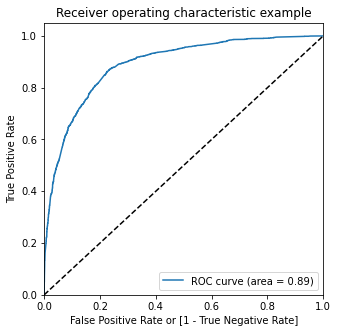

In [98]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding Optimal Cutoff point

In [99]:
# Lets create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range (10)]
for i in numbers:
    y_train_pred_final[i]=y_train_pred_final.Converted_Prob.map(lambda x: 1 if x>i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.098219,5493,0,1,0,0,0,0,0,0,0,0,0
1,0,0.097859,8064,0,1,0,0,0,0,0,0,0,0,0
2,0,0.008938,4716,0,1,0,0,0,0,0,0,0,0,0
3,0,0.355272,9117,0,1,1,1,1,0,0,0,0,0,0
4,1,0.451199,2402,0,1,1,1,1,1,0,0,0,0,0


In [100]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381487  1.000000  0.000000
0.1   0.1  0.605063  0.972625  0.378358
0.2   0.2  0.768038  0.909581  0.680737
0.3   0.3  0.806013  0.867275  0.768227
0.4   0.4  0.814715  0.784737  0.833205
0.5   0.5  0.813766  0.698465  0.884881
0.6   0.6  0.806487  0.625467  0.918138
0.7   0.7  0.783228  0.513065  0.949859
0.8   0.8  0.761234  0.422646  0.970069
0.9   0.9  0.715981  0.277063  0.986697


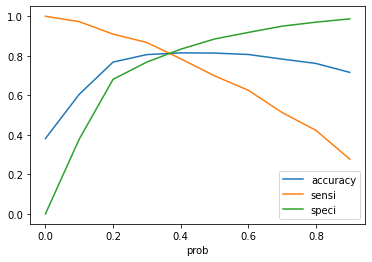

In [101]:
# Lets plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.show()

From the curve above 0.37 is an optimum point to take it as a cutoff probability.

In [102]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.37 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.098219,5493,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.097859,8064,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.008938,4716,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.355272,9117,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.451199,2402,0,1,1,1,1,1,0,0,0,0,0,1


In [103]:
# Now let us calculate the lead score

y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(10)

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,0,0.098219,5493,0,1,0,0,0,0,0,0,0,0,0,0,10
1,0,0.097859,8064,0,1,0,0,0,0,0,0,0,0,0,0,10
2,0,0.008938,4716,0,1,0,0,0,0,0,0,0,0,0,0,1
3,0,0.355272,9117,0,1,1,1,1,0,0,0,0,0,0,0,36
4,1,0.451199,2402,0,1,1,1,1,1,0,0,0,0,0,1,45
5,0,0.036062,1796,0,1,0,0,0,0,0,0,0,0,0,0,4
6,0,0.036062,1120,0,1,0,0,0,0,0,0,0,0,0,0,4
7,0,0.057678,253,0,1,0,0,0,0,0,0,0,0,0,0,6
8,0,0.083388,1491,0,1,0,0,0,0,0,0,0,0,0,0,8
9,1,0.413602,2004,0,1,1,1,1,1,0,0,0,0,0,1,41


In [104]:
# checking if 80% cases are correctly predicted based on the converted column.
# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    1951
0     460
Name: final_predicted, dtype: int64

In [105]:
# check the precentage of final_predicted conversions

1951/float(1951+460)

0.8092077975943592

Hence we can see that the final prediction of conversions have a target of 80.92% conversion as per the X Educations CEO's requirement . Hence this is a good model.

In [106]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8137658227848101


In [107]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
confusion2

array([[3459,  450],
       [ 727, 1684]], dtype=int64)

In [108]:
TP=confusion2[1,1]
TN=confusion2[0,0]
FP=confusion2[0,1]
FN=confusion2[1,0]

In [109]:
# Sensitivity
TP/float(TP+FN)

0.6984653670676068

In [110]:
# Specificity
TN/float(TN+FP)

0.8848810437452034

In [111]:
# False Positive rate
FP/float(TN+FP)

0.11511895625479662

In [112]:
# Positive predictive value
TP/float(TP+FP)

0.7891283973758201

In [113]:
# Negative predictive value
TN/float(TN+ FN)

0.8263258480649786

#### Metrics-Precision and Recall

In [114]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3459,  450],
       [ 727, 1684]], dtype=int64)

In [115]:
from sklearn.metrics import precision_score, recall_score

In [116]:
# Precision
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7891283973758201

In [117]:
# Recall
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6984653670676068

#### Precision-Recall Tradeoff

In [118]:
from sklearn.metrics import precision_recall_curve

In [119]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6315    0
 6316    1
 6317    1
 6318    1
 6319    0
 Name: Converted, Length: 6320, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6315    0
 6316    1
 6317    1
 6318    1
 6319    0
 Name: predicted, Length: 6320, dtype: int64)

In [120]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

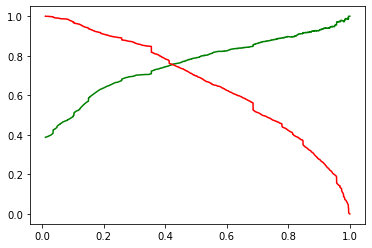

In [121]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

The graph described an optimal cut off of 0.42 based on Precision and Recall. 

### Make Predictions on Test set

In [122]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

In [123]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,LeadOrigin_Lead Add Form,LeadSource_Olark Chat,LeadSource_Welingak Website,LastActivity_Not sure,LastActivity_Olark Chat Conversation,CurrentOccupation_No Information,CurrentOccupation_Working Professional,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Opened,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website
4664,0,-0.884316,0,1,0,0,0,0,0,0,1,0,0,0
5394,0,-0.583371,0,1,0,0,0,1,0,0,0,1,0,0
1595,0,1.264507,0,0,0,0,0,0,1,0,0,1,0,0
2111,0,0.073571,0,0,0,0,0,1,0,0,1,0,0,0
9182,0,-0.884316,0,1,0,0,0,0,0,0,0,1,0,0


In [124]:
X_test_sm = sm.add_constant(X_test)

In [125]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

4664    0.355272
5394    0.135943
1595    0.907962
2111    0.116577
9182    0.258764
1055    0.473122
541     0.074195
446     0.972897
3728    0.030314
4249    0.005946
dtype: float64

In [126]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4664,0.355272
5394,0.135943
1595,0.907962
2111,0.116577
9182,0.258764


In [127]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [128]:
# Putting LeadId to index
y_test_df['Prospect Id'] = y_test_df.index

In [129]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [130]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect Id,0
0,0,4664,0.355272
1,0,5394,0.135943
2,1,1595,0.907962
3,0,2111,0.116577
4,0,9182,0.258764


In [131]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [132]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect Id','Converted','Converted_Prob']]
y_pred_final.head()

,Prospect Id,Converted,Converted_Prob
0,4664,0,0.355272
1,5394,0,0.135943
2,1595,1,0.907962
3,2111,0,0.116577
4,9182,0,0.258764


In [133]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.37 else 0)
y_pred_final.head()

,Prospect Id,Converted,Converted_Prob,final_predicted
0,4664,0,0.355272,0
1,5394,0,0.135943,0
2,1595,1,0.907962,1
3,2111,0,0.116577,0
4,9182,0,0.258764,0


In [134]:
y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head()

,Prospect Id,Converted,Converted_Prob,final_predicted,lead_score
0,4664,0,0.355272,0,36
1,5394,0,0.135943,0,14
2,1595,1,0.907962,1,91
3,2111,0,0.116577,0,12
4,9182,0,0.258764,0,26


In [135]:
# checking if 80% cases are correctly predicted based on the converted column.
# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    866
0    200
Name: final_predicted, dtype: int64

In [136]:
# check the precentage of final_predicted conversions on test data
866/float(866+200)

0.8123827392120075

Hence we can see that the final prediction of conversions have a target rate of 81%.

In [137]:
# Let's check the accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8106312292358804

In [138]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1330,  313],
       [ 200,  866]], dtype=int64)

In [139]:
TP = confusion2[1,1] 
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0]

In [140]:
# Let's see the sensitivity of our logistic regression model
TP/float(TP+FN)

0.8123827392120075

In [141]:
# Specificity
TN/float(TN+FP)

0.8094948265368229

In [142]:
# False Positive Rate
FP/float(TN+FP)

0.1905051734631771

In [143]:
# Positive Predictive Value
TP/float(TP+FP)

0.734520780322307

In [144]:
# Negative Predictive Value
TN/float(TN+ FN)

0.869281045751634

#### Precision and Recall metrics for the test set

In [145]:
# precision
print('precision ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

precision  0.734520780322307


In [146]:
# recall
print('recall ',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

recall  0.8123827392120075


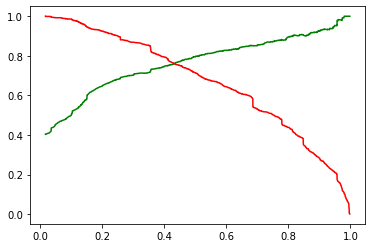

In [147]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

The graph described an optimal cut off of 0.42 based on Precision and Recall. 

#### Conclusion :

- While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the
  optimal cut off based on Sensitivity and Specificity for calculating the final prediction.
- Accuracy, Sensitivity and Specificity values of test set are around 81%, 81% and 80% which are approximately closer to 
  the respective values calculated using trained set.
- Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is 
  around 80%.
- Hence overall this model seems to be good. 